Q1. Load the flight price dataset and examine its dimensions. How many rows and columns does the
dataset have?

In [1]:
import pandas as pd

flight_data = pd.read_excel('flight_price.xlsx')
flight_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [2]:
num_rows, num_cols = flight_data.shape
print(f'The flight dataset has {num_rows} rows')
print(f'The flight dataset has {num_cols} columns')

The flight dataset has 10683 rows
The flight dataset has 11 columns



Q2. What is the distribution of flight prices in the dataset? Create a histogram to visualize the
distribution.

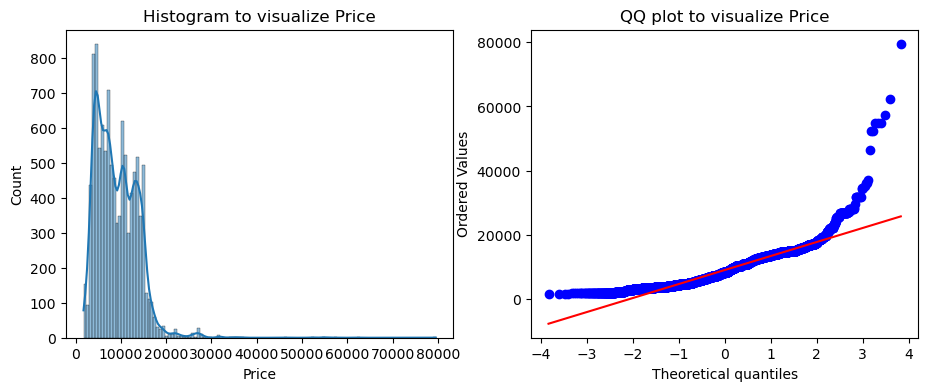

In [3]:
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

def hist_qq_plt(df, feature):
    plt.figure(figsize=(11,4))
    plt.subplot(1,2,1)
    sns.histplot(df[feature], kde = True)
    plt.title(f'Histogram to visualize {feature}')
    plt.subplot(1,2,2)
    stats.probplot(df[feature], dist='norm', plot=plt)
    plt.title(f'QQ plot to visualize {feature}')
    plt.show()
    
hist_qq_plt(flight_data, 'Price')

## As observed flight price is right skewed.

Q3. What is the range of prices in the dataset? What is the minimum and maximum price?

In [4]:
max_price = flight_data['Price'].max()
min_price = flight_data['Price'].min()
range_price = max_price - min_price

print(f'Maximum price is {max_price}')
print(f'Minumum price is {min_price}')
print(f'Range of the price is {range_price}')

Maximum price is 79512
Minumum price is 1759
Range of the price is 77753


In [5]:
flight_data[['Price']].describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


Q4. How does the price of flights vary by airline? Create a boxplot to compare the prices of different
airlines.

In [6]:
flight_data.groupby('Airline')['Price'].describe()

,count,mean,std,min,25%,50%,75%,max
Airline,,,,,,,,
Air Asia,319.0,5590.260188,2027.362290,3383.0,4282.0,5162.0,6451.00,13774.0
Air India,1752.0,9611.210616,3900.952942,2050.0,6896.0,9443.0,12219.00,31945.0
GoAir,194.0,5861.056701,2703.585767,3398.0,3898.0,5135.0,6811.25,22794.0
IndiGo,2053.0,5673.682903,2264.142168,2227.0,4226.0,5000.0,6494.00,22153.0
Jet Airways,3849.0,11643.923357,4258.940578,1840.0,9134.0,11467.0,14151.00,54826.0
Jet Airways Business,6.0,58358.666667,11667.596748,46490.0,52243.0,54747.0,61122.50,79512.0
Multiple carriers,1196.0,10902.678094,3721.234997,5797.0,7723.0,10197.0,13587.00,36983.0
Multiple carriers Premium economy,13.0,11418.846154,1717.153936,9845.0,10161.0,11269.0,11269.00,14629.0
SpiceJet,818.0,4338.284841,1849.922514,1759.0,3574.5,3873.0,4760.00,23267.0


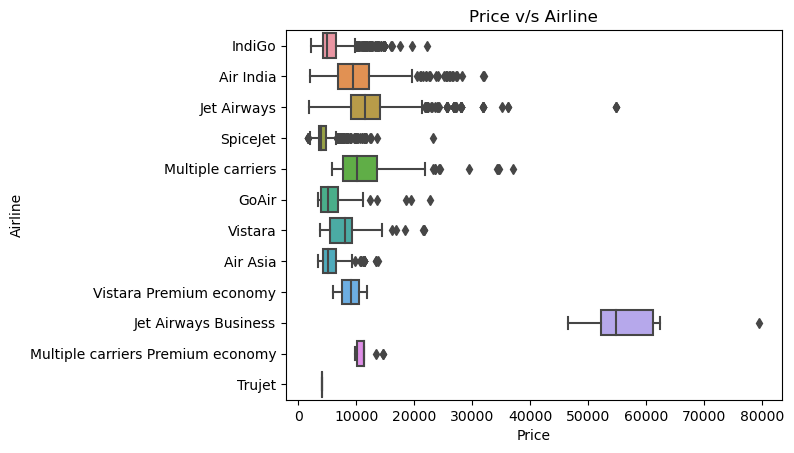

In [7]:
sns.boxplot(data = flight_data, x = 'Price', y = 'Airline')
plt.title('Price v/s Airline')
plt.show()

Q5. Are there any outliers in the dataset? Identify any potential outliers using a boxplot and describe how
they may impact your analysis.

If there are any potential outliers in the flight price dataset, they will be displayed as individual points outside the whiskers of the boxplot. These outliers may represent extreme values or errors in the dataset, and they can have a significant impact on the analysis if not handled appropriately.

If an outlier is a valid data point, it may represent a rare event or a significant variation from the typical values in the dataset.

On the other hand, if an outlier is an error or an invalid data point, it should be removed from the dataset before analysis to avoid skewing the results. 

In conclusion, identifying and interpreting potential outliers in a dataset using a boxplot is an important step in data analysis, as outliers can have a significant impact on the results.

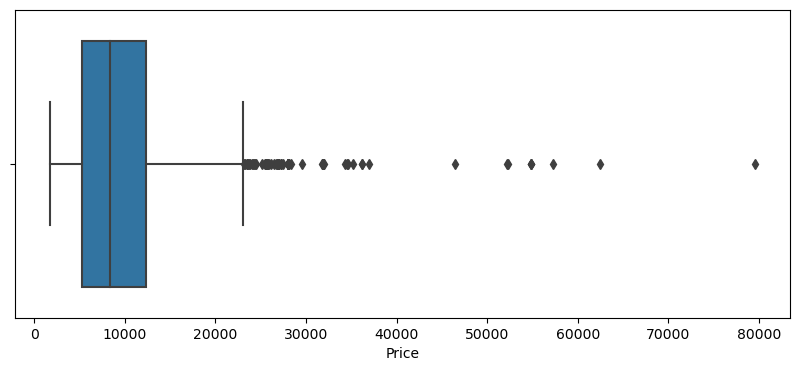

In [8]:
import numpy as np

plt.figure(figsize=(10,4))
sns.boxplot(data = flight_data, x='Price')
plt.show()


In [9]:
q1 = np.quantile(flight_data['Price'], 0.25)
q3 = np.quantile(flight_data['Price'], 0.75)
median = np.median(flight_data['Price'])

iqr = q3-q1

upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)

print(iqr, upper_bound, lower_bound)

7096.0 23017.0 -5367.0


In [10]:
flight_data[flight_data.Price >upper_bound]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
123,Air India,1/03/2019,Delhi,Cochin,DEL → BOM → COK,23:00,19:15 02 Mar,20h 15m,1 stop,No info,27430
396,Multiple carriers,1/03/2019,Delhi,Cochin,DEL → BOM → COK,12:50,19:15,6h 25m,1 stop,No info,36983
486,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,15:15,6h 20m,1 stop,No info,26890
510,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,07:00,12:25,5h 25m,1 stop,No info,26890
597,Air India,6/03/2019,Mumbai,Hyderabad,BOM → JDH → DEL → HYD,09:40,15:15 07 Mar,29h 35m,2 stops,No info,25139
...,...,...,...,...,...,...,...,...,...,...,...
10353,Jet Airways,6/03/2019,Mumbai,Hyderabad,BOM → BDQ → DEL → HYD,19:50,16:50 07 Mar,21h,2 stops,No info,24210
10364,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → MAA → DEL,09:45,14:25,4h 40m,1 stop,Business class,57209
10383,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,07:00,05:05 02 Mar,22h 5m,1 stop,No info,26890
10439,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:40,09:00 02 Mar,14h 20m,1 stop,No info,31825


## There are 94 outliers in the dataset.

Q6. You are working for a travel agency, and your boss has asked you to analyze the Flight Price dataset
to identify the peak travel season. What features would you analyze to identify the peak season, and how
would you present your findings to your boss?

To identify the features that could potentially affect the Flight Price in the peak season should be analyzed. Below are some features. 

1. Departure: Analyzing the average flight prices for each Departure Ciy can reveal any seasonal patterns in travel demand. This analysis can help to identify the Departure Cities with the highest and lowest flight prices.

2. Destination: Analyzing the average flight prices for each Destination City can reveal any seasonal patterns in travel demand. This analysis can help to identify the Destination City with the highest and lowest flight prices.

3. Day of the week: Analyzing the average flight prices for each Day can reveal any seasonal patterns in travel demand. This analysis can help to identify the Day with the highest and lowest flight prices.

4. Month of the week: Analyzing the average flight prices for each month can reveal any seasonal patterns in travel demand. This analysis can help to identify the months with the highest and lowest flight prices.

Now we will visualize the abve features giving the expected key findings. 

In [11]:
flight_data['Date_of_Journey']=pd.to_datetime(flight_data['Date_of_Journey'])
flight_data['Date'] = flight_data['Date_of_Journey'].dt.day
flight_data['Month'] = flight_data['Date_of_Journey'].dt.month
flight_data['Year'] = flight_data['Date_of_Journey'].dt.year
flight_data['Day'] = flight_data['Date_of_Journey'].dt.day_name()


/tmp/ipykernel_109/1745324709.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  flight_data['Date_of_Journey']=pd.to_datetime(flight_data['Date_of_Journey'])


In [12]:
flight_data.groupby('Source').mean()['Price'].sort_values()

/tmp/ipykernel_109/2841050198.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  flight_data.groupby('Source').mean()['Price'].sort_values()


Source
Chennai      4789.892388
Mumbai       5059.708752
Banglore     8017.464269
Kolkata      9158.389411
Delhi       10539.439057
Name: Price, dtype: float64

/tmp/ipykernel_109/3971867932.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  flight_data.groupby('Source').mean()['Price'].sort_values().plot(kind='bar', figsize=(6,4))


<AxesSubplot: xlabel='Source'>

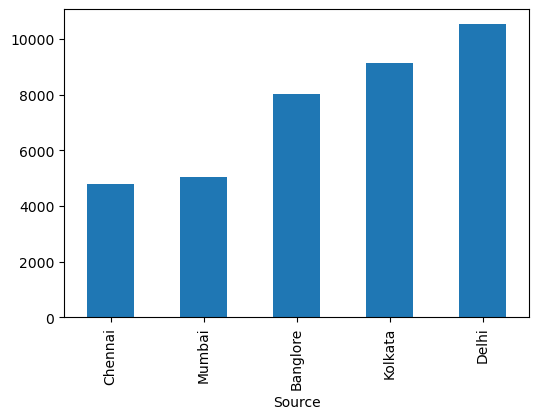

In [13]:
flight_data.groupby('Source').mean()['Price'].sort_values().plot(kind='bar', figsize=(6,4))

In [14]:
flight_data.groupby('Destination').mean()['Price'].sort_values()

/tmp/ipykernel_109/817072869.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  flight_data.groupby('Destination').mean()['Price'].sort_values()


Destination
Kolkata       4789.892388
Hyderabad     5059.708752
Delhi         5143.918577
Banglore      9158.389411
Cochin       10539.439057
New Delhi    11917.716738
Name: Price, dtype: float64

/tmp/ipykernel_109/3227480078.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  flight_data.groupby('Destination').mean()['Price'].sort_values().plot(kind='bar', figsize=(6,4))


<AxesSubplot: xlabel='Destination'>

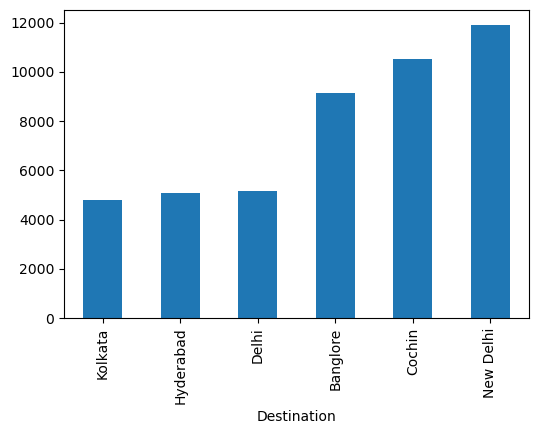

In [15]:
flight_data.groupby('Destination').mean()['Price'].sort_values().plot(kind='bar', figsize=(6,4))

In [16]:
flight_data.groupby('Day').mean()['Price'].sort_values()

/tmp/ipykernel_109/786315002.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  flight_data.groupby('Day').mean()['Price'].sort_values()


Day
Wednesday    7996.290807
Friday       8556.502220
Saturday     8894.375727
Tuesday      8960.452265
Sunday       9556.827684
Monday       9721.101945
Thursday     9805.088646
Name: Price, dtype: float64

/tmp/ipykernel_109/673776403.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  flight_data.groupby('Day').mean()['Price'].sort_values().plot(kind='bar', figsize=(6,4))


<AxesSubplot: xlabel='Day'>

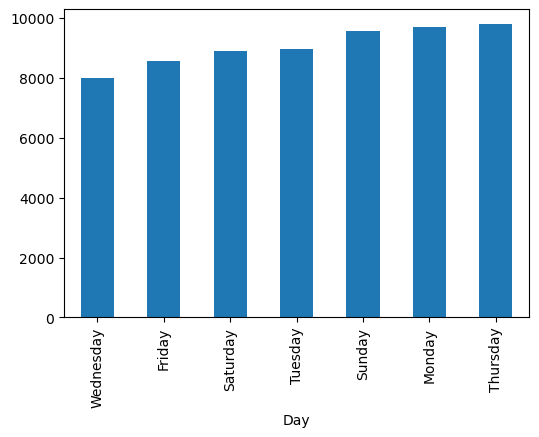

In [17]:
flight_data.groupby('Day').mean()['Price'].sort_values().plot(kind='bar', figsize=(6,4))

In [18]:
flight_data.groupby('Month').mean()['Price'].sort_values()

/tmp/ipykernel_109/754544202.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  flight_data.groupby('Month').mean()['Price'].sort_values()


Month
4      5230.860849
3      8433.839891
12     9110.774295
6      9214.964905
5      9361.077628
9      9551.474395
1     10492.642791
Name: Price, dtype: float64

/tmp/ipykernel_109/3482768648.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  flight_data.groupby('Month').mean()['Price'].sort_values().plot(kind='bar', figsize=(6,4))


<AxesSubplot: xlabel='Month'>

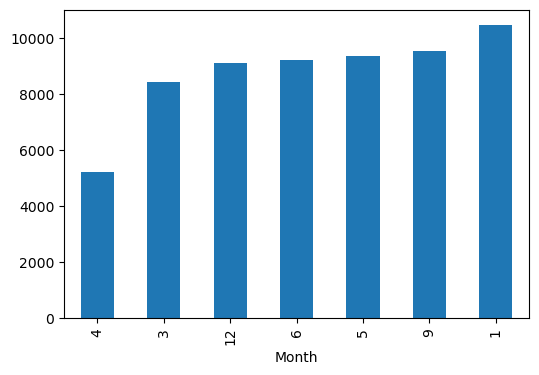

In [19]:
flight_data.groupby('Month').mean()['Price'].sort_values().plot(kind='bar', figsize=(6,4))

##Observations
1. Cheapest flights are from Chennai with average price of Rs.4789.89.
2. Cheapest flight destination for a holiday is Kolkata with average price of Rs.4789.89.
3. Cheapest flight fares are on wednesday with average price of Rs.7996.29.
4. Cheapest flight fares in the month of April with average price of Rs.5230.86.

Q7. You are a data analyst for a flight booking website, and you have been asked to analyze the Flight
Price dataset to identify any trends in flight prices. What features would you analyze to identify these
trends, and what visualizations would you use to present your findings to your team?

To identify trends in flight prices, we would start by analyzing the following features in the Flight Price dataset:

1. Time-related features: These would include date of booking, date of travel, and time of day of travel. By analyzing these features, we can identify whether flight prices tend to be higher or lower during certain times of the year, or certain times of the day.
2. Route-related features: These would include the origin and destination cities of the flights, as well as any stopovers or layovers. By analyzing these features, we can identify whether flight prices tend to be higher or lower for certain routes, or for flights with specific stopover locations.
3. Airline-related features: These would include the airline carrier for each flight. By analyzing these features, we can identify whether certain airlines tend to have higher or lower prices than others.
4. Demand-related features: These would include the number of passengers booked on a flight, as well as the number of seats available. By analyzing these features, we can identify whether flight prices tend to be higher or lower when demand is high or low.


To present my findings to the team, I would use a variety of visualizations. Some examples might include:

Line charts: These could be used to show how flight prices change over time, or how they vary based on the time of day or day of the week.

Scatterplots: These could be used to show the relationship between flight prices and variables like the number of passengers or the number of seats available.

Bar charts: These could be used to compare flight prices across different airlines or different routes.

Heatmaps: These could be used to show which times of year tend to have higher or lower flight prices for different routes.

Q8. You are a data scientist working for an airline company, and you have been asked to analyze the
Flight Price dataset to identify the factors that affect flight prices. What features would you analyze to
identify these factors, and how would you present your findings to the management team?

To identify the factors that affect flight prices, I would start by analyzing the following features in the Flight Price dataset:

- Time-related features: These would include date of booking, date of travel, and time of day of travel. By analyzing these features, we can identify whether flight prices tend to be higher or lower during certain times of the year, or certain times of the day.

- Route-related features: These would include the origin and destination cities of the flights, as well as any stopovers or layovers. By analyzing these features, we can identify whether flight prices tend to be higher or lower for certain routes, or for flights with specific stopover locations.

- Airline-related features: These would include the airline carrier for each flight. By analyzing these features, we can identify whether certain airlines tend to have higher or lower prices than others.

- Demand-related features: These would include the number of passengers booked on a flight, as well as the number of seats available. By analyzing these features, we can identify whether flight prices tend to be higher or lower when demand is high or low.

- Other factors: There may be other features in the dataset that could affect flight prices, such as the type of aircraft used, the length of the flight, or the class of service.

To present my findings to the management team, I would create a report that includes the following:

- Summary statistics: I would provide summary statistics for each feature, including measures of central tendency, variance, and any outliers. This would give the management team a general sense of the distribution of each feature.

- Visualizations: I would create a variety of visualizations to help illustrate the relationships between different features and flight prices. For example, I might create scatterplots to show the relationship between flight prices and the number of passengers or the number of seats available. I might also create bar charts to compare flight prices across different airlines or different routes.

- Regression analysis: I would perform regression analysis to identify the factors that have the greatest impact on flight prices. This would allow me to create a predictive model that could be used to estimate flight prices based on different combinations of features.

- Conclusions and recommendations: Based on my analysis, I would draw conclusions about the factors that have the greatest impact on flight prices and make recommendations to the management team about how they could adjust their pricing strategies to better meet the needs of their customers.

## Google Playstore

Q9. Load the Google Playstore dataset and examine its dimensions. How many rows and columns does
the dataset have?

In [20]:
play_data = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')
play_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [21]:
play_rows, play_cols=play_data.shape
print(f'The dataset has {play_rows} rows.')
print(f'The dataset has {play_cols} columns.')

The dataset has 10841 rows.
The dataset has 13 columns.


Q10. How does the rating of apps vary by category? Create a boxplot to compare the ratings of different
app categories.

In [22]:
play_data[play_data.Category=='1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [23]:
play_data.drop(index=10472, axis=0)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [24]:
play_data.groupby('Category').describe()

Rating                                                   \
                      count       mean       std   min     25%   50%     75%   
Category                                                                       
1.9                     1.0  19.000000       NaN  19.0  19.000  19.0  19.000   
ART_AND_DESIGN         62.0   4.358065  0.358297   3.2   4.100   4.4   4.700   
AUTO_AND_VEHICLES      73.0   4.190411  0.543692   2.1   4.000   4.3   4.600   
BEAUTY                 42.0   4.278571  0.362603   3.1   4.000   4.3   4.575   
BOOKS_AND_REFERENCE   178.0   4.346067  0.429046   2.7   4.100   4.5   4.600   
BUSINESS              303.0   4.121452  0.624422   1.0   3.900   4.3   4.500   
COMICS                 58.0   4.155172  0.537758   2.8   3.825   4.4   4.500   
COMMUNICATION         328.0   4.158537  0.426192   1.0   4.000   4.3   4.400   
DATING                195.0   3.970769  0.630510   1.0   3.700   4.1   4.400   
EDUCATION             155.0   4.389032  0.251894   3.5   4.200   4.4   4.600   
ENTERTAINMENT         149.0   4.126174  0.302556   3.0   3.900   4.2   4.300   
EVENTS                 45.0   4.435556  0.419499   2.9   4.200   4.5   4.700   
FAMILY               1747.0   4.192272  0.508026   1.0   4.000   4.3   4.500   
FINANCE               323.0   4.131889  0.642108   1.0   4.000   4.3   4.500   
FOOD_AND_DRINK        109.0   4.166972  0.548070   1.7   4.000   4.3   4.500   
GAME                 1097.0   4.286326  0.365375   1.0   4.100   4.4   4.500   
HEALTH_AND_FITNESS    297.0   4.277104  0.617822   1.4   4.100   4.5   4.600   
HOUSE_AND_HOME         76.0   4.197368  0.368411   2.8   4.000   4.3   4.500   
LIBRARIES_AND_DEMO     65.0   4.178462  0.378522   3.1   4.000   4.2   4.400   
LIFESTYLE             314.0   4.094904  0.693907   1.5   3.800   4.2   4.600   
MAPS_AND_NAVIGATION   124.0   4.051613  0.519926   1.9   3.775   4.2   4.400   
MEDICAL               350.0   4.189143  0.663581   1.0   4.000   4.3   4.600   
NEWS_AND_MAGAZINES    233.0   4.132189  0.536707   1.7   3.900   4.2   4.500   
PARENTING              50.0   4.300000  0.517845   2.0   4.100   4.4   4.675   
PERSONALIZATION       314.0   4.335987  0.352732   2.5   4.200   4.4   4.600   
PHOTOGRAPHY           317.0   4.192114  0.462896   2.0   4.000   4.3   4.500   
PRODUCTIVITY          351.0   4.211396  0.504931   1.0   4.100   4.3   4.500   
SHOPPING              238.0   4.259664  0.404577   1.6   4.100   4.3   4.500   
SOCIAL                259.0   4.255598  0.413809   1.9   4.100   4.3   4.500   
SPORTS                319.0   4.223511  0.427857   1.5   4.100   4.3   4.500   
TOOLS                 734.0   4.047411  0.616143   1.0   3.800   4.2   4.400   
TRAVEL_AND_LOCAL      226.0   4.109292  0.504691   2.2   3.900   4.3   4.400   
VIDEO_PLAYERS         160.0   4.063750  0.551098   1.8   3.800   4.2   4.400   
WEATHER                75.0   4.244000  0.331353   3.3   4.050   4.3   4.500   

                           
                      max  
Category                   
1.9                  19.0  
ART_AND_DESIGN        5.0  
AUTO_AND_VEHICLES     4.9  
BEAUTY                4.9  
BOOKS_AND_REFERENCE   5.0  
BUSINESS              5.0  
COMICS                5.0  
COMMUNICATION         5.0  
DATING                5.0  
EDUCATION             4.9  
ENTERTAINMENT         4.7  
EVENTS                5.0  
FAMILY                5.0  
FINANCE               5.0  
FOOD_AND_DRINK        5.0  
GAME                  5.0  
HEALTH_AND_FITNESS    5.0  
HOUSE_AND_HOME        4.8  
LIBRARIES_AND_DEMO    5.0  
LIFESTYLE             5.0  
MAPS_AND_NAVIGATION   4.9  
MEDICAL               5.0  
NEWS_AND_MAGAZINES    5.0  
PARENTING             5.0  
PERSONALIZATION       5.0  
PHOTOGRAPHY           5.0  
PRODUCTIVITY          5.0  
SHOPPING              5.0  
SOCIAL                5.0  
SPORTS                5.0  
TOOLS                 5.0  
TRAVEL_AND_LOCAL      5.0  
VIDEO_PLAYERS         4.9  
WEATHER               4.8

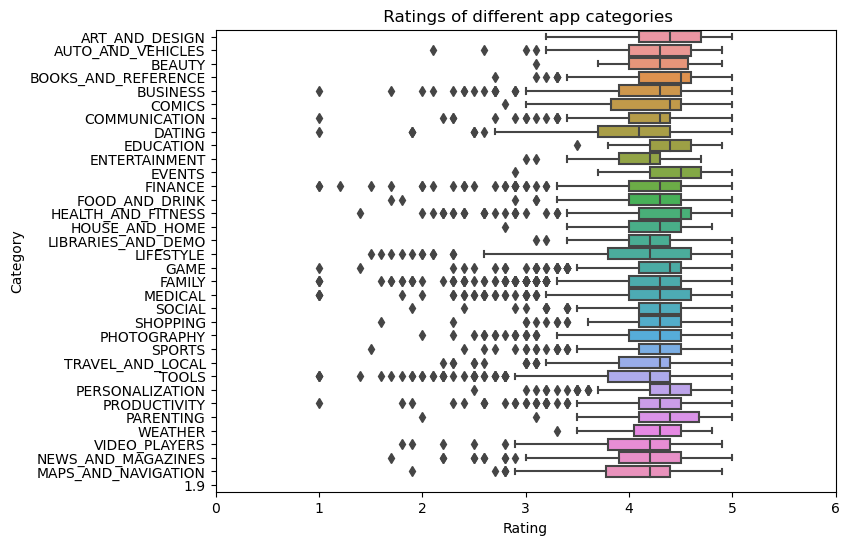

In [25]:
plt.figure(figsize=(8,6))
sns.boxplot(data=play_data, x='Rating', y='Category')
plt.xlim([0,6])
plt.title(' Ratings of different app categories')
plt.show()

Q11. Are there any missing values in the dataset? Identify any missing values and describe how they may
impact your analysis.

In [26]:
play_data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

1. There are 1474 missing values in Ratings.
2. There are 1 missing values in Type.
3. There are 1 missing values in Content Rating.
4. There are 1 missing values in Current Ver.
5. There are 3 missing values in Android Ver.

Missing data in the Google Play dataset can significantly impact the accuracy and reliability of the analysis. If key attributes such as app ratings, user reviews, or download counts are missing, it can lead to biased results and incorrect insights. For example, the absence of user ratings might skew the average rating calculation, making some apps appear more or less popular than they actually are.

Missing data can also distort patterns and trends, affecting the identification of factors contributing to app success. Furthermore, handling missing data improperly (e.g., ignoring them or inappropriate imputation) can reduce the model's predictive power and generalizability, leading to flawed decision-making and strategy formulation for app developers and marketers. Therefore, addressing missing data through suitable techniques is crucial for ensuring robust and meaningful analysis.

Q12. What is the relationship between the size of an app and its rating? Create a scatter plot to visualize
the relationship.

In [27]:
play_data['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [28]:
play_data['Size']=play_data['Size'].str.replace('M','000')
play_data['Size']=play_data['Size'].str.replace('k','')
play_data['Size']=play_data['Size'].replace('Varies with device',np.nan)
play_data['Size'] = play_data['Size'].replace('1,000+','1')
play_data['Size']=play_data['Size'].astype(float)


play_data['Size']

0        19000.0
1        14000.0
2            8.7
3        25000.0
4            2.8
          ...   
10836    53000.0
10837        3.6
10838        9.5
10839        NaN
10840    19000.0
Name: Size, Length: 10841, dtype: float64

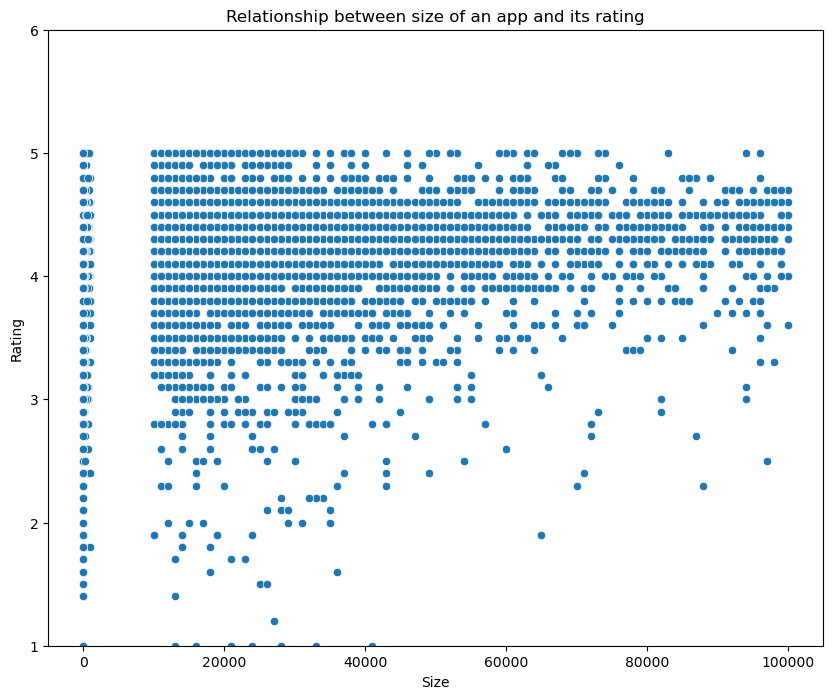

In [29]:
plt.figure(figsize=(10,8))
plt.title('Relationship between size of an app and its rating')
sns.scatterplot(data=play_data, x='Size', y='Rating')
plt.ylim([1,6])
plt.show()


Q13. How does the type of app affect its price? Create a bar chart to compare average prices by app type.

In [30]:
play_data.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [31]:
play_data['Type'].unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

In [32]:
play_data['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [33]:
chars_to_remove=['+',',','$']
col_to_clean=['Price']
for items in chars_to_remove:
    for col in col_to_clean:
        play_data[col]=play_data[col].str.replace(items,'')
        

/tmp/ipykernel_109/239089883.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  play_data[col]=play_data[col].str.replace(items,'')


In [34]:
(play_data['Price']=='Everyone').sum()

1

In [35]:
play_data[play_data.Price=='Everyone']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,1.0,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [36]:
play_data.drop(index=10472, axis=0, inplace=True)

In [37]:
play_data.iloc[10472]

App               osmino Wi-Fi: free WiFi
Category                            TOOLS
Rating                                4.2
Reviews                            134203
Size                                  4.1
Installs                      10,000,000+
Type                                 Free
Price                                   0
Content Rating                   Everyone
Genres                              Tools
Last Updated               August 7, 2018
Current Ver                       6.06.14
Android Ver                    4.4 and up
Name: 10473, dtype: object

In [38]:
play_data['Price']=play_data['Price'].astype(float)

In [39]:
play_data.groupby('Type').mean()['Price']

/tmp/ipykernel_109/887283504.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  play_data.groupby('Type').mean()['Price']


Type
Free     0.000000
Paid    13.920837
Name: Price, dtype: float64

/tmp/ipykernel_109/2733849316.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  play_data.groupby('Type').mean()['Price'].plot(kind='bar', title=' average prices by app type.')


<AxesSubplot: title={'center': ' average prices by app type.'}, xlabel='Type'>

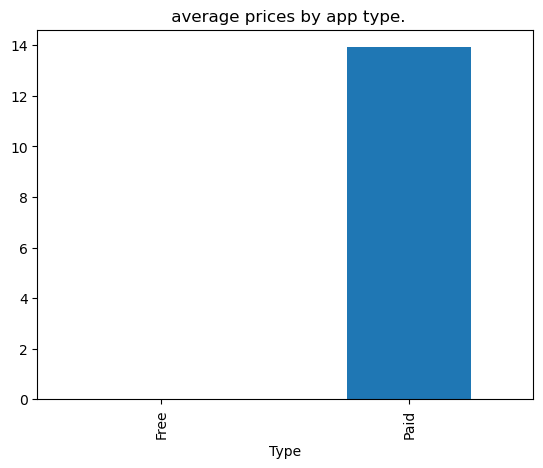

In [40]:
play_data.groupby('Type').mean()['Price'].plot(kind='bar', title=' average prices by app type.')

## Observations

1. Free apps have 0 average price.
2. Paid apps have 13.92 average price.

Q14. What are the top 10 most popular apps in the dataset? Create a frequency table to identify the apps
with the highest number of installs.

In [41]:
play_data['App'].duplicated().sum()

1181

In [42]:
play_data.drop_duplicates(subset=['App'], keep='first')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,"5,000+",Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100+,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5,"1,000+",Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,"1,000+",Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [43]:
chars_to_remove=['+',',']
col_to_clean=['Installs']
for items in chars_to_remove:
    for col in col_to_clean:
        play_data[col]=play_data[col].str.replace(items,'')

/tmp/ipykernel_109/737451066.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  play_data[col]=play_data[col].str.replace(items,'')


In [44]:
play_data['Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

In [45]:
play_data['Installs']=play_data['Installs'].astype(int)

In [46]:
top_10_apps = play_data.sort_values(by=['Installs','Rating'],ascending=False).head(10)[['App','Installs','Rating']]
top_10_apps

,App,Installs,Rating
1654,Subway Surfers,1000000000,4.5
1700,Subway Surfers,1000000000,4.5
1750,Subway Surfers,1000000000,4.5
1872,Subway Surfers,1000000000,4.5
1917,Subway Surfers,1000000000,4.5
2545,Instagram,1000000000,4.5
2604,Instagram,1000000000,4.5
2611,Instagram,1000000000,4.5
2808,Google Photos,1000000000,4.5
2853,Google Photos,1000000000,4.5


In [47]:
list(top_10_apps['App'])

['Subway Surfers',
 'Subway Surfers',
 'Subway Surfers',
 'Subway Surfers',
 'Subway Surfers',
 'Instagram',
 'Instagram',
 'Instagram',
 'Google Photos',
 'Google Photos']

Q15. A company wants to launch a new app on the Google Playstore and has asked you to analyze the
Google Playstore dataset to identify the most popular app categories. How would you approach this
task, and what features would you analyze to make recommendations to the company?

In [48]:
play_data['Category'].value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: Category, dtype: int64

<AxesSubplot: title={'center': 'most popular app categories'}>

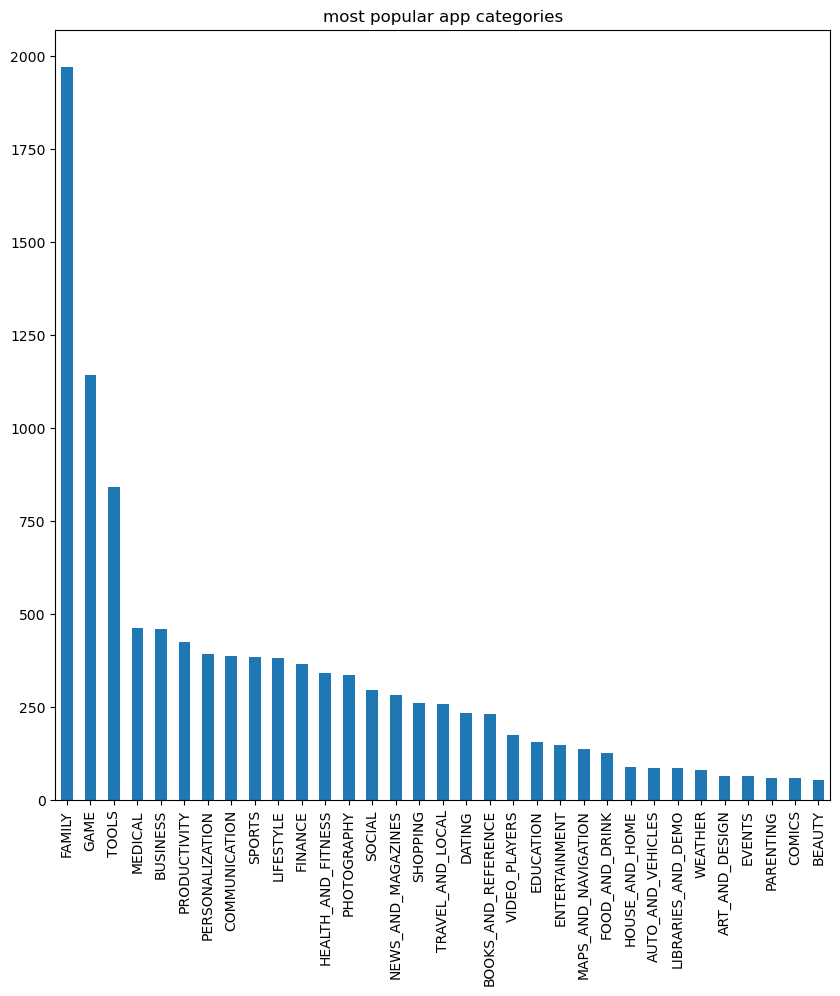

In [49]:
play_data['Category'].value_counts().plot(kind='bar', title='most popular app categories', figsize=(10,10))

In [50]:
play_data.groupby('Category').mean()['Rating'].sort_values(ascending=False)

/tmp/ipykernel_109/3956406276.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  play_data.groupby('Category').mean()['Rating'].sort_values(ascending=False)


Category
EVENTS                 4.435556
EDUCATION              4.389032
ART_AND_DESIGN         4.358065
BOOKS_AND_REFERENCE    4.346067
PERSONALIZATION        4.335987
PARENTING              4.300000
GAME                   4.286326
BEAUTY                 4.278571
HEALTH_AND_FITNESS     4.277104
SHOPPING               4.259664
SOCIAL                 4.255598
WEATHER                4.244000
SPORTS                 4.223511
PRODUCTIVITY           4.211396
HOUSE_AND_HOME         4.197368
FAMILY                 4.192272
PHOTOGRAPHY            4.192114
AUTO_AND_VEHICLES      4.190411
MEDICAL                4.189143
LIBRARIES_AND_DEMO     4.178462
FOOD_AND_DRINK         4.166972
COMMUNICATION          4.158537
COMICS                 4.155172
NEWS_AND_MAGAZINES     4.132189
FINANCE                4.131889
ENTERTAINMENT          4.126174
BUSINESS               4.121452
TRAVEL_AND_LOCAL       4.109292
LIFESTYLE              4.094904
VIDEO_PLAYERS          4.063750
MAPS_AND_NAVIGATION    4.051613

/tmp/ipykernel_109/2523367718.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  play_data.groupby('Category').mean()['Rating'].sort_values(ascending=False).plot(kind='bar', title='most popular app categories based on ratings', figsize=(10,10))


<AxesSubplot: title={'center': 'most popular app categories based on ratings'}, xlabel='Category'>

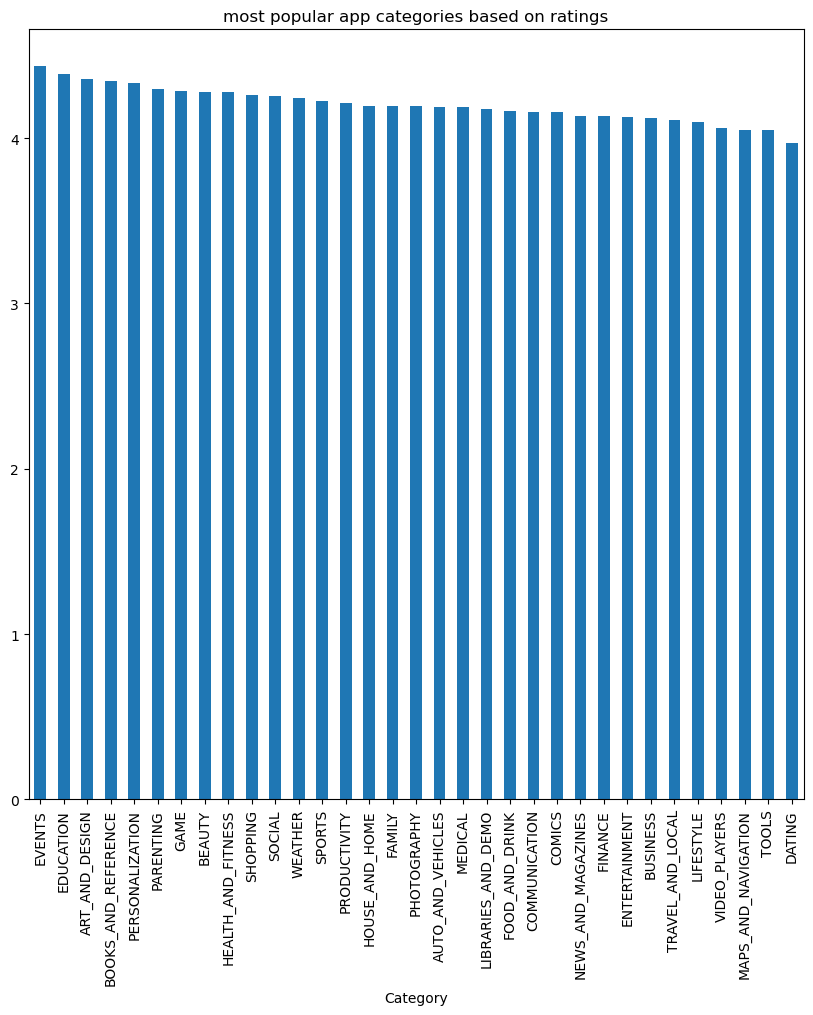

In [51]:
play_data.groupby('Category').mean()['Rating'].sort_values(ascending=False).plot(kind='bar', title='most popular app categories based on ratings', figsize=(10,10))

In [52]:
play_data.groupby('Category').mean()['Installs'].sort_values(ascending=False)

/tmp/ipykernel_109/1881101368.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  play_data.groupby('Category').mean()['Installs'].sort_values(ascending=False)


Category
COMMUNICATION          8.435989e+07
SOCIAL                 4.769447e+07
VIDEO_PLAYERS          3.555430e+07
PRODUCTIVITY           3.343418e+07
GAME                   3.066960e+07
PHOTOGRAPHY            3.011417e+07
TRAVEL_AND_LOCAL       2.662359e+07
NEWS_AND_MAGAZINES     2.648876e+07
ENTERTAINMENT          1.925611e+07
TOOLS                  1.358573e+07
SHOPPING               1.249173e+07
BOOKS_AND_REFERENCE    8.318050e+06
PERSONALIZATION        5.932385e+06
EDUCATION              5.586231e+06
MAPS_AND_NAVIGATION    5.286729e+06
FAMILY                 5.201959e+06
WEATHER                5.196348e+06
HEALTH_AND_FITNESS     4.642441e+06
SPORTS                 4.560350e+06
FINANCE                2.395215e+06
BUSINESS               2.178076e+06
FOOD_AND_DRINK         2.156683e+06
HOUSE_AND_HOME         1.917187e+06
ART_AND_DESIGN         1.912894e+06
LIFESTYLE              1.407444e+06
DATING                 1.129533e+06
COMICS                 9.347692e+05
LIBRARIES_AND_DEMO 

/tmp/ipykernel_109/2136170913.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  play_data.groupby('Category').mean()['Installs'].sort_values(ascending=False).plot(kind='bar', title='most popular app categories based on avrage Installs', figsize=(10,10))


<AxesSubplot: title={'center': 'most popular app categories based on avrage Installs'}, xlabel='Category'>

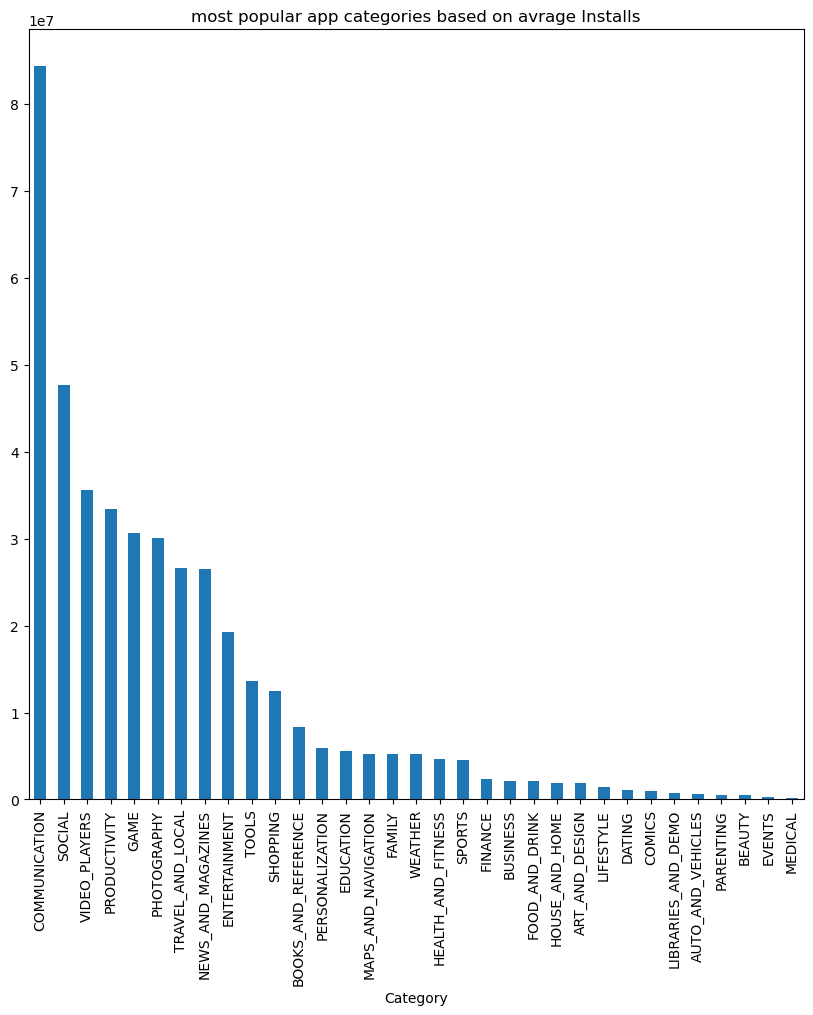

In [53]:
play_data.groupby('Category').mean()['Installs'].sort_values(ascending=False).plot(kind='bar', title='most popular app categories based on avrage Installs', figsize=(10,10))

## Observations

1. Top 3 app Categories with highest value count are : Family, Game, Tools
2. Top 3 app Categories with highest average rating are : Events, Education and Arts Designs.
3. Top 3 app Categories with highest installs are : Communication, Social and Video players.

Q16. A mobile app development company wants to analyze the Google Playstore dataset to identify the
most successful app developers. What features would you analyze to make recommendations to the
company, and what data visualizations would you use to present your findings?

In [54]:
play_data.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up


To identify the succesfull app developers in th Google Playstore dataset, we should analyze variety of features such as app's popularity, quality and user engagement. Below are key features which should be analyzed.

1. App Ratings: This would indicate overall user satisfaction.
2. Install: This would show the popularity and reach of the app.
3. Reviews: This indicates users engagement and feedback frequency.
4. App size: This would affect download decisons.
5. Price: This would show how pricing strategy affects success.
6. Category: Success might vary significantly across different app categories.

Data Visualizations to present findings:

1. Bar charts:
- Display Developers with highest average apps.
- Show developers whose apps have the most installs.
- Highlight developers with the most user reviews. 

2. Heatmaps:
- Show correlation between features like ratings, installs, reviews and app size. 

3. Box Plot:
- Compare the distribution of app ratings across the different categories to identify high performing categories.
- Compare the installs across different categories.

4. Scatter Plot:
- Visualize relation betwwwn app ratings and number of installs.
- For paid apps, visualize the relation between price and user rating.

5. Line Plot:
- Show trends in app updates over time showing  developer's active development practices.



In [55]:
play_data.sort_values(['Installs','Rating'], ascending=False).head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1654,Subway Surfers,GAME,4.5,27722264,76000.0,1000000000,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
1700,Subway Surfers,GAME,4.5,27723193,76000.0,1000000000,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
1750,Subway Surfers,GAME,4.5,27724094,76000.0,1000000000,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
1872,Subway Surfers,GAME,4.5,27725352,76000.0,1000000000,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
1917,Subway Surfers,GAME,4.5,27725352,76000.0,1000000000,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
2545,Instagram,SOCIAL,4.5,66577313,NaN,1000000000,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2604,Instagram,SOCIAL,4.5,66577446,NaN,1000000000,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2611,Instagram,SOCIAL,4.5,66577313,NaN,1000000000,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2808,Google Photos,PHOTOGRAPHY,4.5,10858556,NaN,1000000000,Free,0.0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device
2853,Google Photos,PHOTOGRAPHY,4.5,10858538,NaN,1000000000,Free,0.0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device


In [56]:
play_data.corr()

/tmp/ipykernel_109/2498025113.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  play_data.corr()


,Rating,Size,Installs,Price
Rating,1.000000,0.082134,0.051355,-0.021903
Size,0.082134,1.000000,0.164608,-0.022772
Installs,0.051355,0.164608,1.000000,-0.011689
Price,-0.021903,-0.022772,-0.011689,1.000000


In [57]:
play_data.groupby(['Category', 'Installs']).mean()['Rating']

/tmp/ipykernel_109/74254724.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  play_data.groupby(['Category', 'Installs']).mean()['Rating']


Category        Installs
ART_AND_DESIGN  0                NaN
                100         5.000000
                1000        4.366667
                5000        4.375000
                10000       4.445455
                              ...   
WEATHER         500000      4.428571
                1000000     4.233333
                5000000     4.112500
                10000000    4.327273
                50000000    4.420000
Name: Rating, Length: 514, dtype: float64

In [65]:
play_data.groupby(by='Genres').mean()['Rating'].sort_values(ascending=False)[0:10]

/tmp/ipykernel_109/2424151014.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  play_data.groupby(by='Genres').mean()['Rating'].sort_values(ascending=False)[0:10]


Genres
Comics;Creativity              4.800000
Board;Pretend Play             4.800000
Health & Fitness;Education     4.700000
Adventure;Brain Games          4.600000
Strategy;Action & Adventure    4.600000
Puzzle;Education               4.600000
Entertainment;Creativity       4.533333
Music;Music & Video            4.533333
Arcade;Pretend Play            4.500000
Tools;Education                4.500000
Name: Rating, dtype: float64

/tmp/ipykernel_109/1312019505.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  play_data.groupby(by='Genres').mean()['Rating'].sort_values(ascending=False)[0:10].plot(kind='bar',figsize=(10,10),title='Genres vs Average Rating')


<AxesSubplot: title={'center': 'Genres vs Average Rating'}, xlabel='Genres'>

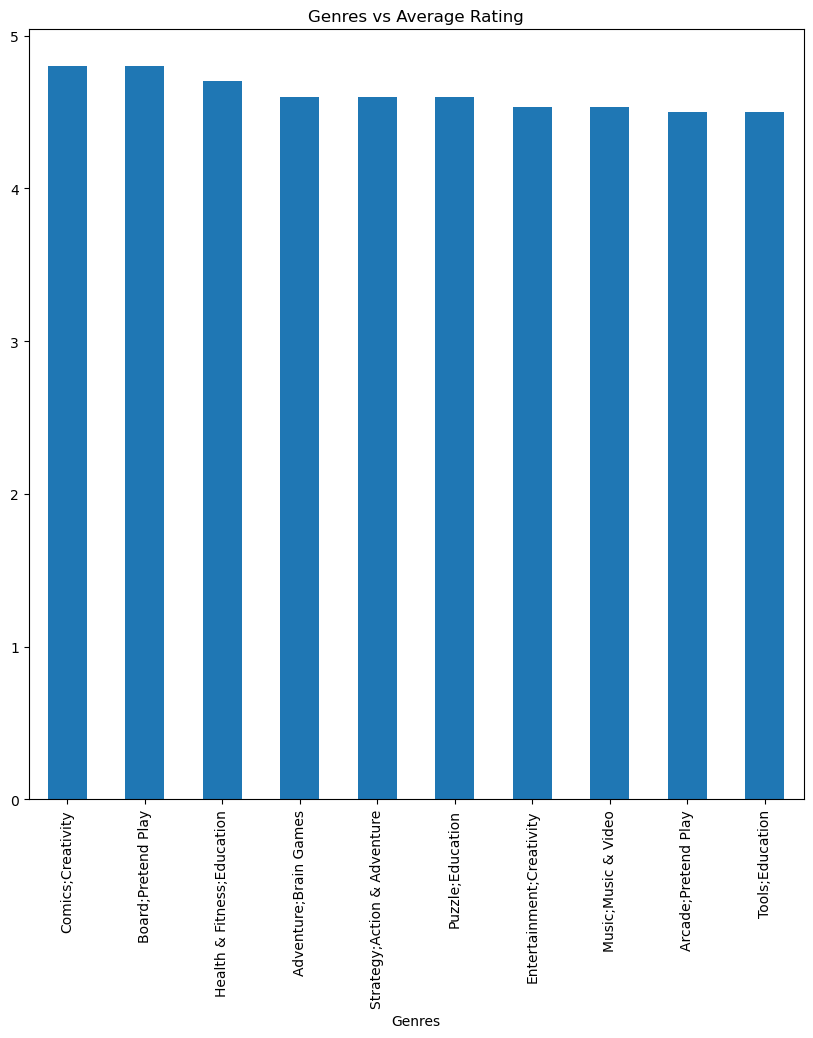

In [67]:
play_data.groupby(by='Genres').mean()['Rating'].sort_values(ascending=False)[0:10].plot(kind='bar',figsize=(10,10),title='Genres vs Average Rating')

In [60]:
play_data.groupby(by='Type').mean()['Rating']

/tmp/ipykernel_109/2109940525.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  play_data.groupby(by='Type').mean()['Rating']


Type
Free    4.186203
Paid    4.266615
Name: Rating, dtype: float64

/tmp/ipykernel_109/1105823376.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  play_data.groupby(by='Type').mean()['Rating'].plot(kind='bar')


<AxesSubplot: xlabel='Type'>

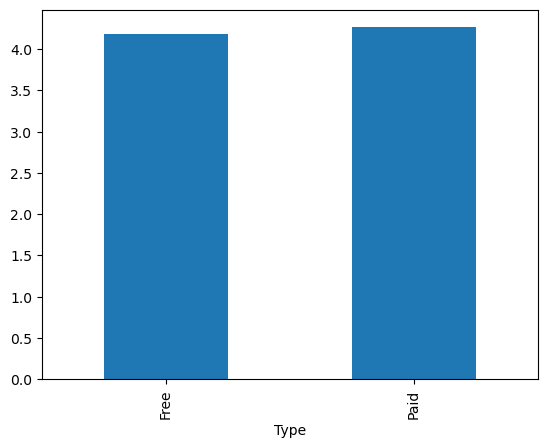

In [61]:
play_data.groupby(by='Type').mean()['Rating'].plot(kind='bar')

In [63]:
play_data.groupby(by='Type').sum()['Installs']

/tmp/ipykernel_109/214271261.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  play_data.groupby(by='Type').sum()['Installs']


Type
Free    167560477406
Paid        72956081
Name: Installs, dtype: int64

Top 3 apps with highest Installs and Ratings are : Subway Surfers, Instagram and Google Photos

Top 3 Genres with highest Average Rating are : Comics , Board, Health and fitness

Paid apps have slightly better average Rating

Free apps are installed a lot when compared to Paid apps.



Q17. A marketing research firm wants to analyze the Google Playstore dataset to identify the best time to
launch a new app. What features would you analyze to make recommendations to the company, and
what data visualizations would you use to present your findings?

To identify the best tiem to launch a new app on Google Play Store, we should analyze few feature that provide insights into app performances trends over time, seasonality, user enagagement and market competition. Below are the key feature to analyze:

1. Launch Date:
- Extracting the month from launch date to analyze the seasonal trends.
- Determine if certain days of the week are more favorable formlaunching apps.

2. Installs:
- Track how installs trend ove the year.

3. Ratings and Reviews:
- Analyze how user engagement varies over the year.

4. App Updates: 
- Determine how frequently apps are updated and the timing of these updates.

5. Category:
- Different categories may have different launch time based on user interest and competition.


Data visulaizations to represent findings.

- Time series plots to show no. of installs ver different months and days to identify trends. Also how reviews and ratings change over time.
- Heatmap to visulaize the intensity of installs, ratings and reviews across different months and days.
- Bar charts to display how many apps are launched each month and frequency of app updates.
- Box Plots to compare the spread of installs across different months. 
- Scatter plot to visulaize relationship between the number of launches and installs over time.  

In [68]:
play_data.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up


In [69]:
play_data['Last Updated']=pd.to_datetime(play_data['Last Updated'])
play_data['Day']= play_data['Last Updated'].dt.day
play_data['Month']= play_data['Last Updated'].dt.month
play_data['Year']= play_data['Last Updated'].dt.year
play_data['Day_name']= play_data['Last Updated'].dt.day_name()


In [70]:
play_data.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year,Day_name
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018,Sunday


In [72]:
play_data.groupby('Month').sum()['Installs']

/tmp/ipykernel_109/1785394088.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  play_data.groupby('Month').sum()['Installs']


Month
1      1186499286
2      1017961455
3      1186028825
4      2893864919
5      6232315327
6      8186207674
7     74442911579
8     68668379529
9       460172325
10      590374124
11     1618368297
12     1150350147
Name: Installs, dtype: int64

/tmp/ipykernel_109/3228673833.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  play_data.groupby('Month').sum()['Installs'].plot(kind='bar')


<AxesSubplot: xlabel='Month'>

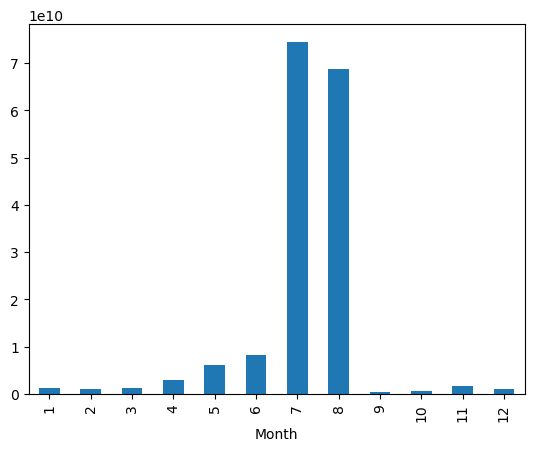

In [73]:
play_data.groupby('Month').sum()['Installs'].plot(kind='bar')

In [91]:
play_data.groupby('Day').sum()['Installs']

/tmp/ipykernel_109/1858322513.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  play_data.groupby('Day').sum()['Installs']


Day
1     18708596156
2     12855760634
3     21198791556
4      3521993362
5      8364627500
6     17235939548
7      1205402812
8      2480516932
9      1301356033
10     1058586285
11     3203060117
12     7891497528
13      894474831
14     1272573120
15     1519442887
16     3293434621
17     1108617088
18     4813327037
19     3783790734
20     1352354742
21     5042222540
22     1299856891
23     2272309997
24     1989869904
25     4599052628
26     6175961141
27     2685520132
28      943663415
29     1361221188
30     7394046971
31    16805565157
Name: Installs, dtype: int64

/tmp/ipykernel_109/3272287074.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  play_data.groupby('Day').sum()['Installs'].plot(kind='bar')


<AxesSubplot: xlabel='Day'>

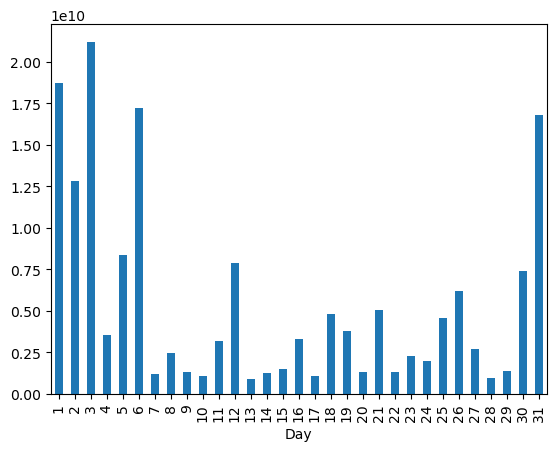

In [92]:
play_data.groupby('Day').sum()['Installs'].plot(kind='bar')

In [99]:
play_data.groupby('Day_name').sum()['Installs']

/tmp/ipykernel_109/4131471693.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  play_data.groupby('Day_name').sum()['Installs']


Day_name
Friday       29936984611
Monday       32018805316
Saturday      8026061268
Sunday        2347276239
Thursday     39425203708
Tuesday      24605911573
Wednesday    31273190772
Name: Installs, dtype: int64

/tmp/ipykernel_109/3951884613.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  play_data.groupby('Day_name').sum()['Installs'].plot(kind='bar')


<AxesSubplot: xlabel='Day_name'>

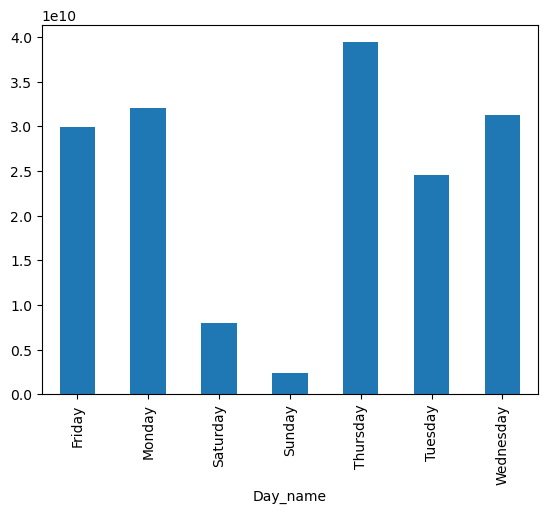

In [100]:
play_data.groupby('Day_name').sum()['Installs'].plot(kind='bar')

In [93]:
play_data.groupby('Year').sum()['Installs']

/tmp/ipykernel_109/3618775540.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  play_data.groupby('Year').sum()['Installs']


Year
2010          100000
2011        17407100
2012        13992210
2013       103191365
2014       269956226
2015       424541475
2016      1401495793
2017      4071454839
2018    161331294479
Name: Installs, dtype: int64

/tmp/ipykernel_109/304627728.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  play_data.groupby('Year').sum()['Installs'].plot(kind='bar')


<AxesSubplot: xlabel='Year'>

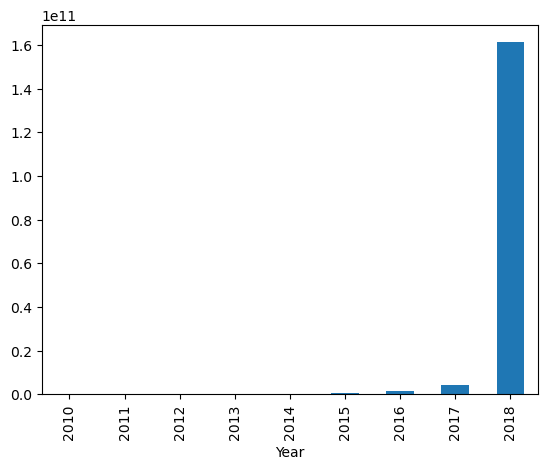

In [94]:
play_data.groupby('Year').sum()['Installs'].plot(kind='bar')

In [95]:
play_data.groupby('Month').mean()['Rating']

/tmp/ipykernel_109/893154464.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  play_data.groupby('Month').mean()['Rating']


Month
1     4.142892
2     4.096209
3     4.114000
4     4.154600
5     4.161031
6     4.184372
7     4.250141
8     4.293108
9     4.042636
10    4.016460
11    4.112298
12    4.071006
Name: Rating, dtype: float64

/tmp/ipykernel_109/2772523409.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  play_data.groupby('Month').mean()['Rating'].plot(kind='bar')


<AxesSubplot: xlabel='Month'>

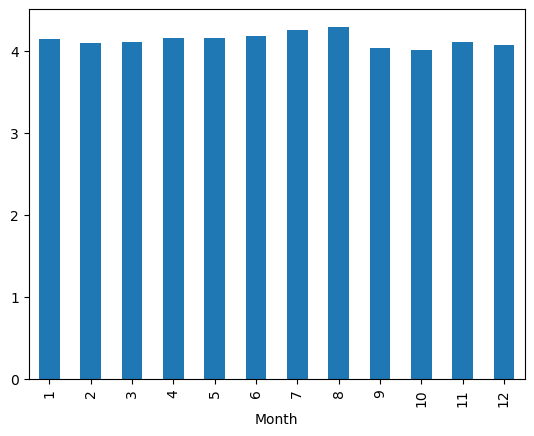

In [96]:
play_data.groupby('Month').mean()['Rating'].plot(kind='bar')

In [97]:
play_data.groupby('Day_name').mean()['Rating']

/tmp/ipykernel_109/3112965114.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  play_data.groupby('Day_name').mean()['Rating']


Day_name
Friday       4.212445
Monday       4.163227
Saturday     4.204232
Sunday       4.267523
Thursday     4.193427
Tuesday      4.188200
Wednesday    4.170873
Name: Rating, dtype: float64

/tmp/ipykernel_109/3466349093.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  play_data.groupby('Day_name').mean()['Rating'].plot(kind='bar')


<AxesSubplot: xlabel='Day_name'>

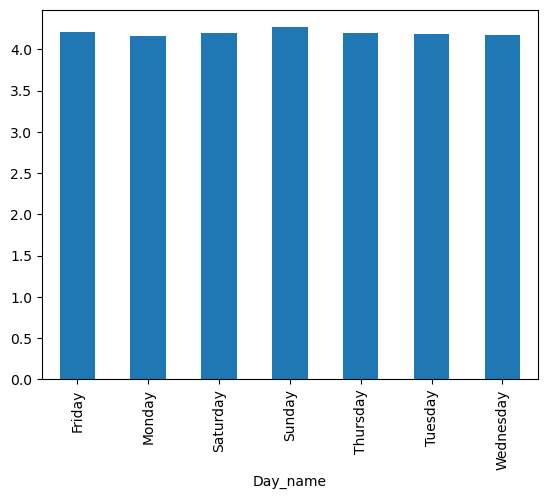

In [98]:
play_data.groupby('Day_name').mean()['Rating'].plot(kind='bar')

##Observations

- Average Reviews are almost the same irrespective of days of the week and months.
- Most apps are installed in the month of July.
- Most weeks are updated on first week of the month.
- Most apps are installed on Thursday.
- Apps installs are increasing each year.